In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from sklearn import svm
from sklearn import neighbors
from sklearn import tree  
from sklearn import metrics
from sklearn import preprocessing
import math
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
label_a = pd.read_csv("./data/label_all.csv")
label_a1 = label_a['SY']
label_a2 = label_a['TY']
S_Y = label_a1.values
T_Y = label_a2.values
features_a = pd.read_csv("./data/feature_all.csv")
features_a = features_a.values
S_X = features_a[:,0:4]
T_X = features_a[:,4:8]
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
S_X = ss_X.fit_transform(S_X)
T_X = ss_X.transform(T_X)

In [3]:
from sklearn.svm import SVC
def fit_grid_point_RBF(C, gamma, X_train, y_train, X_val, y_val):
    SVC3 =  SVC( C = C, kernel='rbf', gamma = gamma)
    SVC3 = SVC3.fit(X_train, y_train)
    y_pred1 = SVC3.predict(X_val)
    accuracy=metrics.accuracy_score(y_val, y_pred1)
    kappa=metrics.cohen_kappa_score(y_val, y_pred1)
    con_mat= metrics.confusion_matrix(y_val,y_pred1)
    return accuracy, kappa, con_mat
C_s = np.logspace(-2, 2, 5)
gamma_s = np.logspace(-2, 2, 5)  
accuracy1 = []
accuracy2 = []
kappa1=[]
kappa2=[]
con_mat1=[]
con_mat2=[]

accuracy [0.83983649] 
 kappa   [0.7789943] 
 conf_mat 
 [[1089    0    0  326   31    8    2]
 [   0   38    0   27    0    0    0]
 [   0    0   56   28    0    0    4]
 [  77    0    0 2288  115   76   77]
 [   1    0    0  146  507  127   38]
 [   1    0    0   87  104 4227   24]
 [   0    0    0   52  226  147  835]]


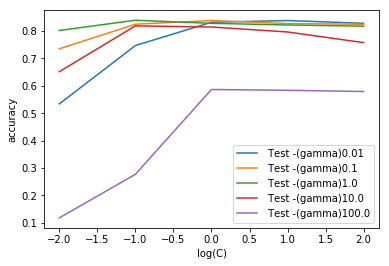

In [4]:
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp_acc,tmp_kappa,tmp_cm = fit_grid_point_RBF(oneC, gamma, S_X,S_Y, T_X, T_Y)
        accuracy1.append(tmp_acc)
        kappa1.append(tmp_kappa)
        con_mat1.append(tmp_cm)
accuracy1 =np.array(accuracy1).reshape(len(C_s),len(gamma_s))
row1,column1=np.where(accuracy1==accuracy1.max())
kappa1 =np.array(kappa1).reshape(len(C_s),len(gamma_s))
con_mat1=np.array(con_mat1).reshape(len(C_s),len(gamma_s),7,7)
print('accuracy',
      accuracy1[row1,column1],'\n kappa  ',
      kappa1[row1,column1],'\n conf_mat \n',
      con_mat1[row1,column1].reshape(7,7))
x_axis = np.log10(C_s)
for j, gamma in enumerate(gamma_s):
    pyplot.plot(x_axis, np.array(accuracy1[:,j]), label = ' Test -(gamma)' + str(gamma))
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )
pyplot.savefig('./pic/svm-total-tar.png' )
pyplot.show()
print()

accuracy [1.] 
 kappa   [1.] 
 conf_mat 
 [[1456    0    0    0    0    0    0]
 [   0  118    0    0    0    0    0]
 [   0    0   83    0    0    0    0]
 [   0    0    0 2689    0    0    0]
 [   0    0    0    0  701    0    0]
 [   0    0    0    0    0 2273    0]
 [   0    0    0    0    0    0 3444]]


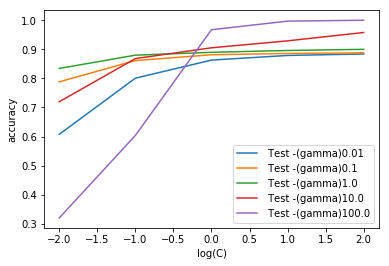

In [5]:
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp_acc,tmp_kappa,tmp_cm = fit_grid_point_RBF(oneC, gamma, S_X,S_Y, S_X, S_Y)
        accuracy2.append(tmp_acc)
        kappa2.append(tmp_kappa)
        con_mat2.append(tmp_cm)
accuracy2 =np.array(accuracy2).reshape(len(C_s),len(gamma_s))
row2,column2=np.where(accuracy2==accuracy2.max())
kappa2 =np.array(kappa2).reshape(len(C_s),len(gamma_s))
con_mat2=np.array(con_mat2).reshape(len(C_s),len(gamma_s),7,7)
print('accuracy',
      accuracy2[row2,column2],'\n kappa  ',
      kappa2[row2,column2],'\n conf_mat \n',
      con_mat2[row2,column2].reshape(7,7))
x_axis = np.log10(C_s)
for j, gamma in enumerate(gamma_s):
    pyplot.plot(x_axis, np.array(accuracy2[:,j]), label = ' Test -(gamma)' + str(gamma))
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuracy' )
pyplot.savefig('./pic/svm-total-src.png' )
pyplot.show()